In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cargar los datos de generación y meteorológicos para la planta 2
plant_2_generation = pd.read_csv('Plant_2_Generation_Data.csv')
plant_2_weather = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

# Copiar los datos de generación para mantener df_GD2 limpio
df_GD2 = plant_2_generation.copy()

# Aplicar el mapeo a los nombres de los paneles solares
unique_source_keys_list_2 = df_GD2['SOURCE_KEY'].unique()
source_key_mapping_2 = {key: f"Solar_Panel_{i+1}" for i, key in enumerate(unique_source_keys_list_2)}
df_GD2['SOURCE_KEY'] = df_GD2['SOURCE_KEY'].map(source_key_mapping_2)

# Convertir la columna 'DATE_TIME' a formato de fecha y hora
# Ajustar el formato de fecha según sea necesario para que coincida con el archivo de la planta 2
df_GD2['DATE_TIME'] = pd.to_datetime(df_GD2['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
plant_2_weather['DATE_TIME'] = pd.to_datetime(plant_2_weather['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Unir los datos meteorológicos al dataframe de generación en función de la fecha y hora
df_GD2_with_weather = pd.merge(df_GD2, plant_2_weather, on='DATE_TIME', how='left')

# Eliminar las columnas PLANT_ID_y y SOURCE_KEY_y y renombrar las columnas PLANT_ID_x y SOURCE_KEY_x
df_GD2_with_weather_clean = df_GD2_with_weather.drop(columns=['PLANT_ID_y', 'SOURCE_KEY_y', 'PLANT_ID_x'])

# Renombrar las columnas para eliminar el sufijo '_x'
df_GD2_with_weather_clean = df_GD2_with_weather_clean.rename(columns={'SOURCE_KEY_x': 'SOURCE_KEY'})

# Mostrar cuántos valores nulos hay por columna
nulos2 = df_GD2_with_weather_clean.isnull().sum()
print("Valores nulos en cada columna (planta 2):\n", nulos2)

# Rellenar los valores nulos en solo las columnas numéricas con la media
numerical_cols_2 = df_GD2_with_weather_clean.select_dtypes(include=['float64', 'int64']).columns
df_GD2_with_weather_clean[numerical_cols_2] = df_GD2_with_weather_clean[numerical_cols_2].fillna(df_GD2_with_weather_clean[numerical_cols_2].mean())

# Guardar el dataframe limpio de la planta 2
df_GD2_limpio = df_GD2_with_weather_clean

Valores nulos en cada columna (planta 2):
 DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [3]:
features = ['AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD','AMBIENT_TEMPERATURE', 
            'MODULE_TEMPERATURE', 'IRRADIATION']
# Definir X (variables predictoras) y Y (variable objetivo)
X = df_GD2_limpio[features]
Y = df_GD2_limpio['DC_POWER']


___

# Entrenamiento

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [6]:
model_1 = AdaBoostRegressor()
model_2 = BaggingRegressor()
model_3 = CatBoostRegressor(verbose=0)
model_4 = DecisionTreeRegressor()
model_5 = ElasticNet()
model_6 = ExtraTreesRegressor()
model_7 = KNeighborsRegressor()
model_8 = Lasso()
model_9 = LGBMRegressor(verbose=0)
model_10 = LinearRegression()
model_11 = RandomForestRegressor()
model_12 = Ridge()
model_13 = SVR()
model_14 = XGBRegressor(verbose=0)
model_15 = SGDRegressor()

In [7]:
model_1.fit(X_train, y_train)

AdaBoostRegressor()

In [8]:
model_2.fit(X_train, y_train)

BaggingRegressor()

In [9]:
model_3.fit(X_train, y_train)

In [10]:
model_4.fit(X_train, y_train)

DecisionTreeRegressor()

In [11]:
model_5.fit(X_train, y_train)

ElasticNet()

In [12]:
model_6.fit(X_train, y_train)

ExtraTreesRegressor()

In [13]:
model_7.fit(X_train, y_train)

KNeighborsRegressor()

In [14]:
model_8.fit(X_train, y_train)

Lasso()

In [15]:
model_9.fit(X_train, y_train)

LGBMRegressor(verbose=0)

In [16]:
model_10.fit(X_train, y_train)

LinearRegression()

In [17]:
model_11.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
model_12.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.19321e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [19]:
model_13.fit(X_train, y_train)

SVR()

In [20]:
model_14.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:17:53] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
model_15.fit(X_train, y_train)

SGDRegressor()

In [ ]:
# List of models:
models = [model_1, model_2, model_3, model_4, model_5,
          model_6, model_7, model_8, model_9, model_10,
          model_11, model_12, model_13, model_14, model_15]  
models_names = ['AdaBoostRegressor', 
                'BaggingRegressor', 
                'CatBoostRegressor', 
                'DecisionTreeRegressor', 
                'ElasticNet', 
                'ExtraTreesRegressor', 
                'KNeighborsRegressor', 
                'LGBMRegressor', 
                'Lasso', 
                'LinearRegression', 
                'RandomForestRegressor', 
                'Ridge', 
                'SVR', 
                'XGBRegressor',
                'SGDRegressor'] 

# Calculate predictions and squared errors for each model:
squared_errors = []
for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    squared_errors.append(f'{mse:.2f}')  

# Calculate train and test scores:
train_score = [model.score(X_train, y_train) for model in models]
test_score = [model.score(X_test, y_test) for model in models]
r2_scores = [r2_score(y_test, model.predict(X_test)) for model in models] 

# Difference between training and testing ratio
ratio = []
for train, test in zip(train_score, test_score):
    result = train - test
    ratio.append(f'{result * 100:.2f}%')

# Measure model state:6
rate = []
for train, test in zip(train_score, test_score):
    if train <= 0.65 and test <= 0.65:
        rate.append('bad')
    elif train > test * 1.10:
        rate.append('overfite')
    elif train > 0.65 and train < 0.80 and test > 0.65 and test < 0.80:
        rate.append('middle')
    elif train >= 0.80 and test >= 0.80 and train < 1.00 and test < 1.00:
        rate.append('good')
    elif train >= 0.80 and test < 0.80:
        rate.append('high train, low test')
    else:
        rate.append('unknown')

# Create DataFrame
model_score = pd.DataFrame({
    'Modelo': models_names,
    'Train score': [f'{round(score * 100, 2)}%' for score in train_score],
    'Test score': [f'{round(score * 100, 2)}%' for score in test_score],
    'R² score': [f'{round(r2, 2)}' for r2 in r2_scores],
    'Ratio difference': ratio,
    'Evaluate model': rate,
    'Squared error': squared_errors
})

# Filtrar modelos cuyo `Train score` sea menor o igual a 105%
model_score = model_score[model_score['Train score'].apply(lambda x: 0 <= float(x.strip('%')) <= 105)]

# Show result:
model_score

,Modelo,Train score,Test score,R² score,Ratio difference,Evaluate model,Squared error
0,AdaBoostRegressor,99.78%,99.78%,1.0,-0.00%,good,297.07
1,BaggingRegressor,100.0%,100.0%,1.0,0.00%,good,0.15
2,CatBoostRegressor,100.0%,100.0%,1.0,0.00%,good,3.22
3,DecisionTreeRegressor,100.0%,100.0%,1.0,0.00%,unknown,0.21
4,ElasticNet,100.0%,100.0%,1.0,-0.00%,good,0.83
5,ExtraTreesRegressor,100.0%,100.0%,1.0,0.00%,good,0.18
6,KNeighborsRegressor,94.63%,90.21%,0.9,4.42%,good,13366.33
7,LGBMRegressor,100.0%,100.0%,1.0,-0.00%,good,0.83
8,Lasso,100.0%,100.0%,1.0,0.00%,good,1.79
9,LinearRegression,100.0%,100.0%,1.0,-0.00%,good,0.80


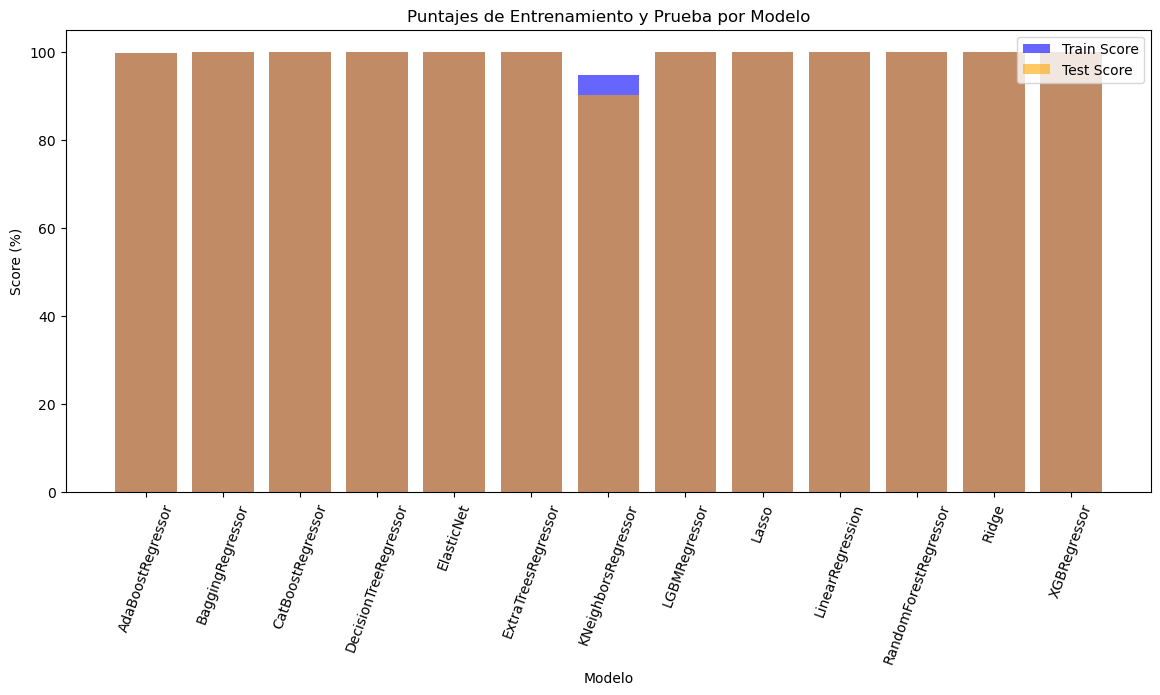

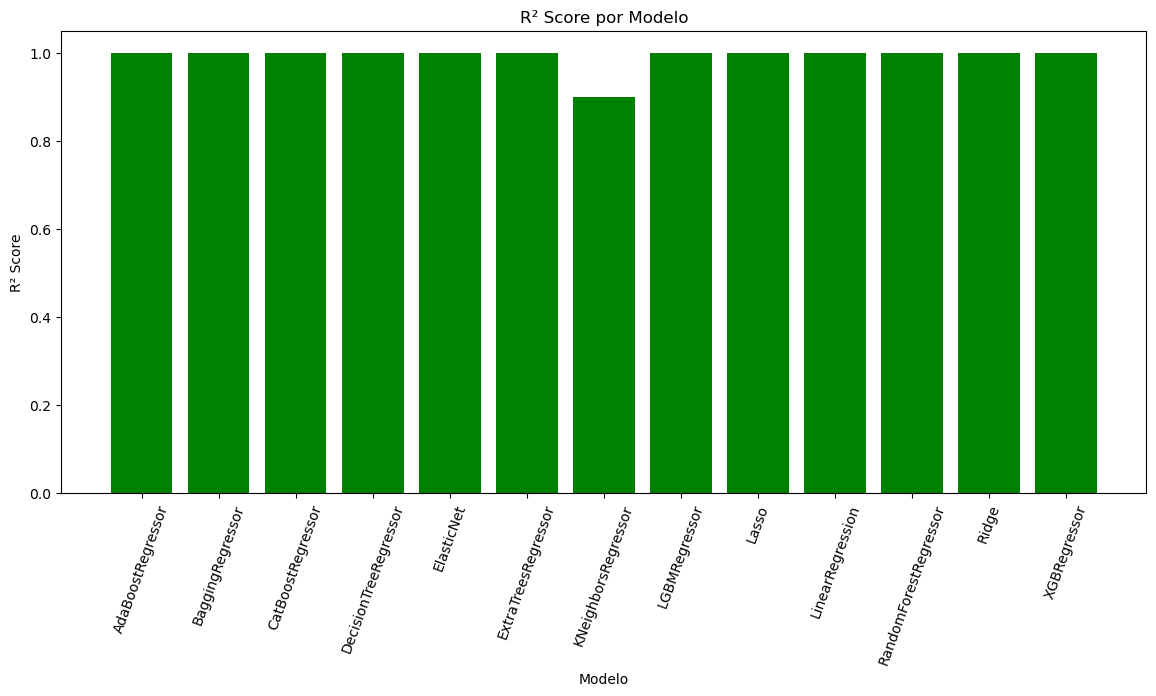

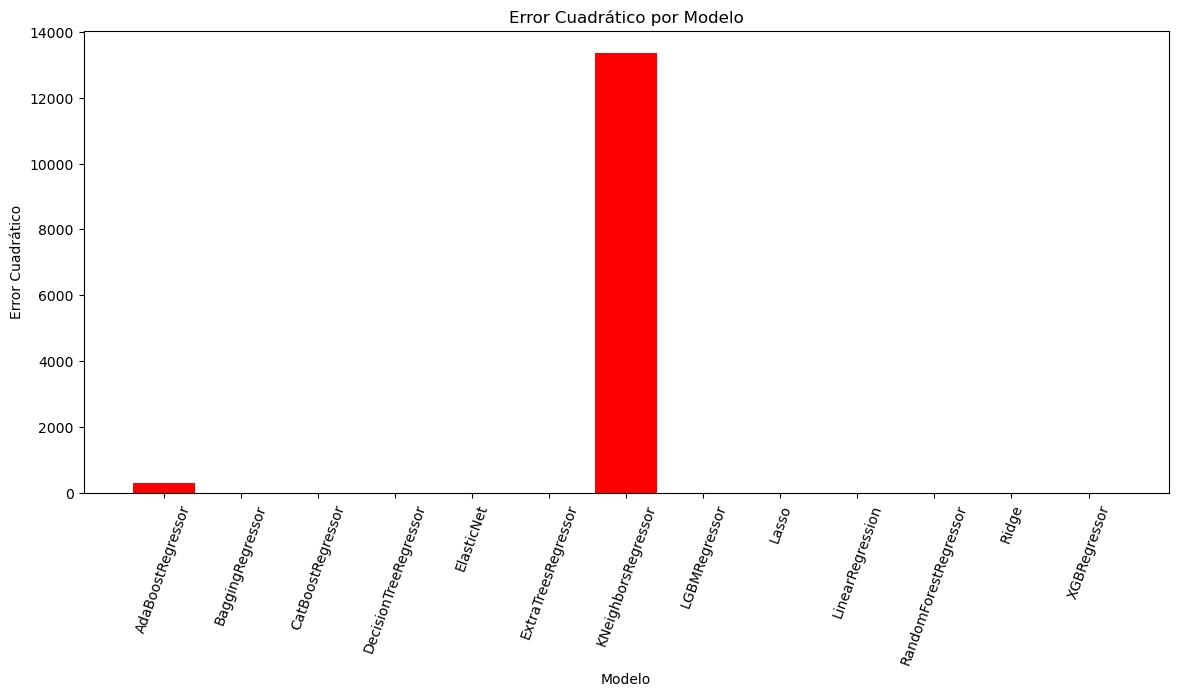

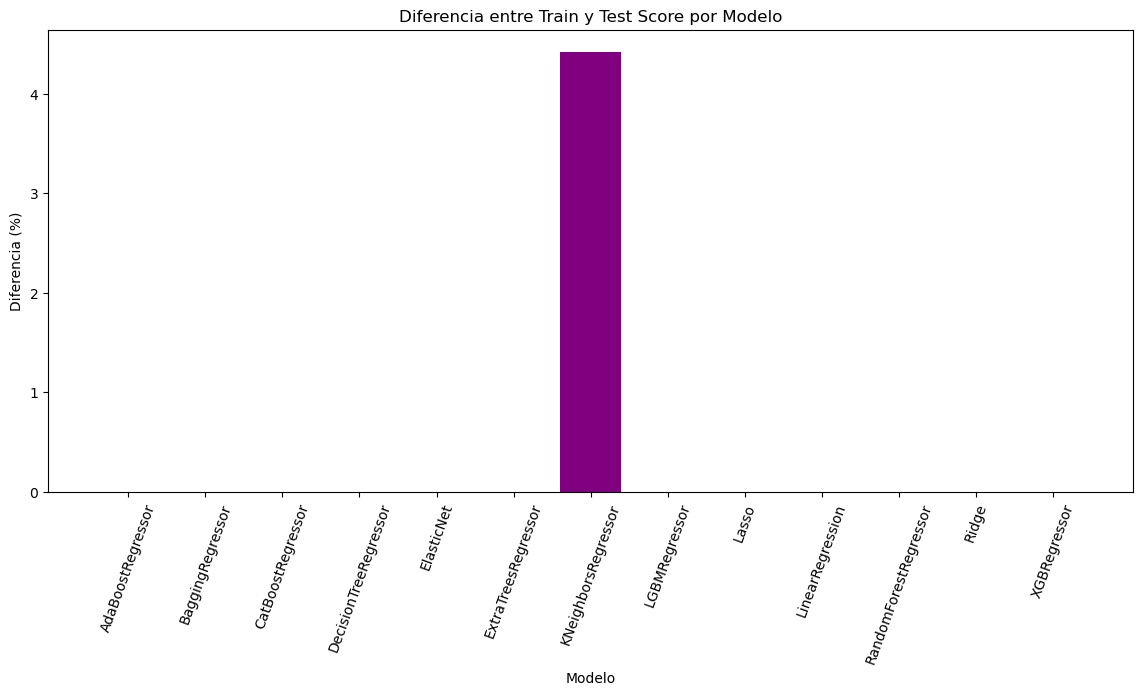

In [23]:
# Gráfica de Barras de los Puntajes de Entrenamiento y Prueba
plt.figure(figsize=(14, 6))
plt.bar(model_score['Modelo'], model_score['Train score'].str.rstrip('%').astype(float), color='blue', alpha=0.6, label='Train Score')
plt.bar(model_score['Modelo'], model_score['Test score'].str.rstrip('%').astype(float), color='orange', alpha=0.6, label='Test Score')
plt.xticks(rotation=70)
plt.title('Puntajes de Entrenamiento y Prueba por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Score (%)')
plt.legend()
plt.show()

# Gráfica de R² Score
plt.figure(figsize=(14, 6))
plt.bar(model_score['Modelo'], model_score['R² score'].astype(float), color='green')
plt.xticks(rotation=70)
plt.title('R² Score por Modelo')
plt.xlabel('Modelo')
plt.ylabel('R² Score')
plt.show()

# Gráfica de Errores Cuadráticos (Squared Error)
plt.figure(figsize=(14, 6))
plt.bar(model_score['Modelo'], model_score['Squared error'].str.rstrip('%').astype(float), color='red')
plt.xticks(rotation=70)
plt.title('Error Cuadrático por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Error Cuadrático')
plt.show()

# Gráfica de Diferencia entre Train y Test Score
plt.figure(figsize=(14, 6))
train_test_diff = model_score['Train score'].str.rstrip('%').astype(float) - model_score['Test score'].str.rstrip('%').astype(float)
plt.bar(model_score['Modelo'], train_test_diff, color='purple')
plt.xticks(rotation=70)
plt.title('Diferencia entre Train y Test Score por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Diferencia (%)')
plt.show()
